In [1]:
#calling the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [3]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [9]:
train.shape

(31647, 18)

In [10]:
test.shape

(13564, 17)

In [11]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

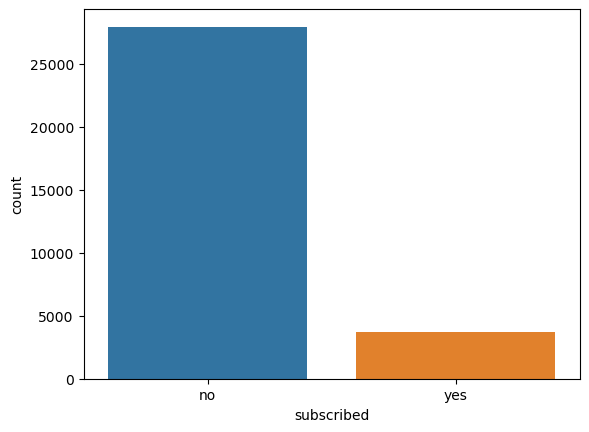

In [14]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

In [15]:
df_subscribed = train[train['subscribed'] == 'yes']
 
df_subscribed

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
10,14699,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,yes
18,35310,44,blue-collar,married,primary,no,4031,yes,no,cellular,7,may,983,4,-1,0,unknown,yes
23,14731,39,management,married,tertiary,no,285,yes,no,cellular,15,jul,838,3,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31611,33754,65,management,divorced,tertiary,no,90,yes,no,cellular,22,apr,416,1,-1,0,unknown,yes
31622,44152,79,retired,divorced,primary,no,2787,no,no,telephone,13,jul,617,1,377,1,success,yes
31632,5195,33,blue-collar,married,secondary,no,0,yes,no,unknown,21,may,521,3,-1,0,unknown,yes
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes


In [16]:
# Converting the target variables into 0s and 1s
df_subscribed['subscribed'].replace('no', 0,inplace=True)
df_subscribed['subscribed'].replace('yes', 1,inplace=True)

In [17]:
cor=df_subscribed.corr()
cor

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.099334,0.069861,-0.083250,-0.504830,-0.229046,0.393589,0.316404,NaN
age,0.099334,1.000000,0.117559,0.006708,-0.027090,-0.017489,0.034861,0.040518,NaN
balance,0.069861,0.117559,1.000000,0.019174,-0.022071,-0.001232,0.002147,0.017961,NaN
day,-0.083250,0.006708,0.019174,1.000000,0.036519,0.093393,-0.020405,-0.040247,NaN
duration,-0.504830,-0.027090,-0.022071,0.036519,1.000000,0.171885,-0.159607,-0.143958,NaN
campaign,-0.229046,-0.017489,-0.001232,0.093393,0.171885,1.000000,-0.104966,-0.060844,NaN
pdays,0.393589,0.034861,0.002147,-0.020405,-0.159607,-0.104966,1.000000,0.430867,NaN
previous,0.316404,0.040518,0.017961,-0.040247,-0.143958,-0.060844,0.430867,1.000000,NaN
subscribed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<Axes: xlabel='job', ylabel='count'>

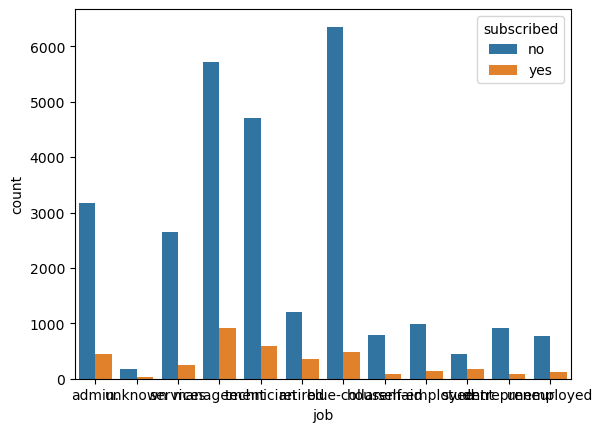

In [19]:
sns.countplot(data=train, x='job', hue='subscribed')

<Axes: xlabel='marital', ylabel='count'>

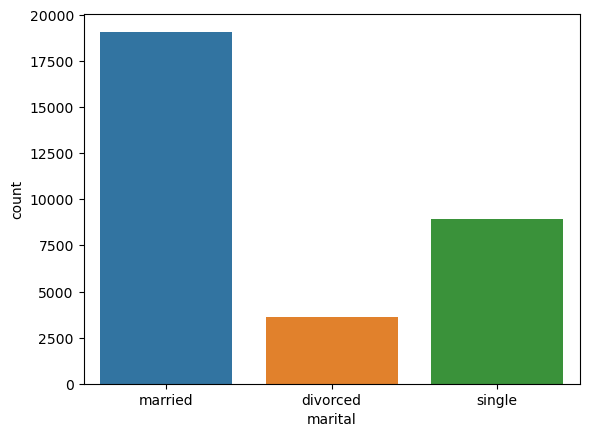

In [20]:
train['marital'].value_counts()
sns.countplot(data=train, x='marital')

<Axes: xlabel='marital', ylabel='count'>

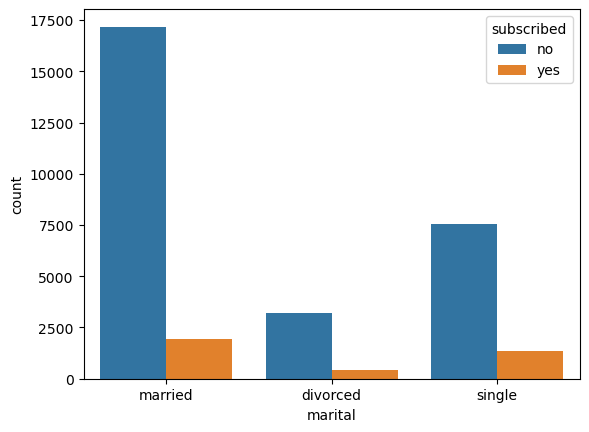

In [21]:
sns.countplot(data=train, x='marital', hue='subscribed')

<Axes: xlabel='age', ylabel='Density'>

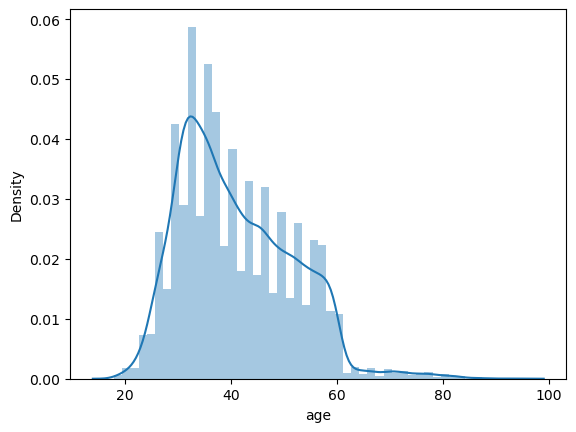

In [22]:
sns.distplot(train['age'])

<Axes: xlabel='job'>

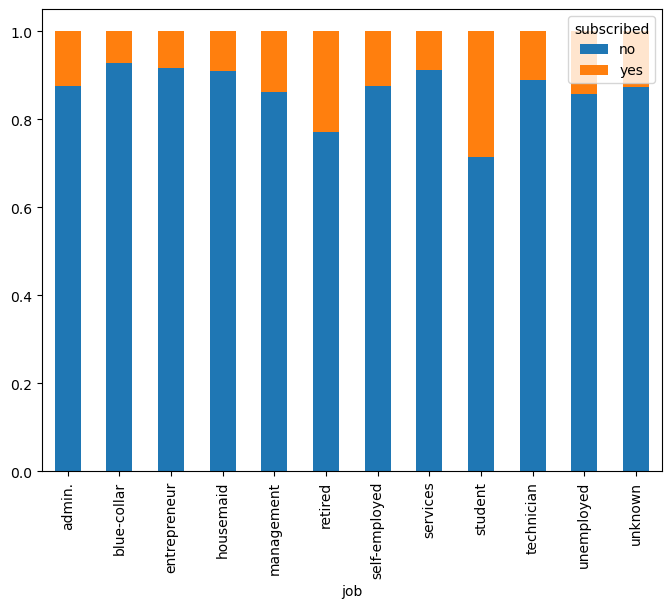

In [23]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6))

In [24]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [25]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [26]:
cor = train.corr()
cor

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


<Axes: >

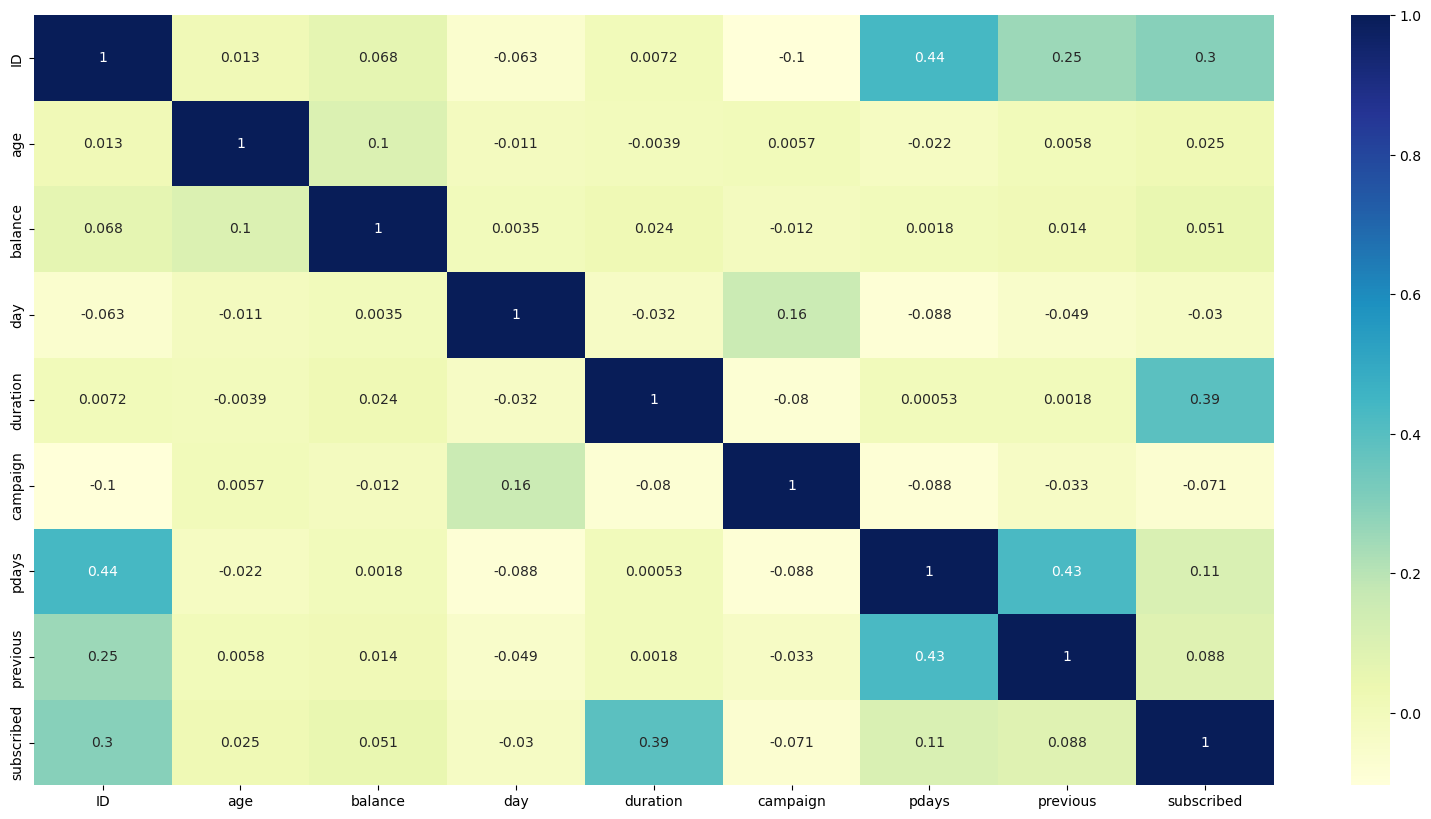

In [27]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor, annot=True, cmap='YlGnBu')

ID               Axes(0.125,0.53;0.110714x0.35)
age           Axes(0.257857,0.53;0.110714x0.35)
balance       Axes(0.390714,0.53;0.110714x0.35)
day           Axes(0.523571,0.53;0.110714x0.35)
duration      Axes(0.656429,0.53;0.110714x0.35)
campaign      Axes(0.789286,0.53;0.110714x0.35)
pdays            Axes(0.125,0.11;0.110714x0.35)
previous      Axes(0.257857,0.11;0.110714x0.35)
subscribed    Axes(0.390714,0.11;0.110714x0.35)
dtype: object

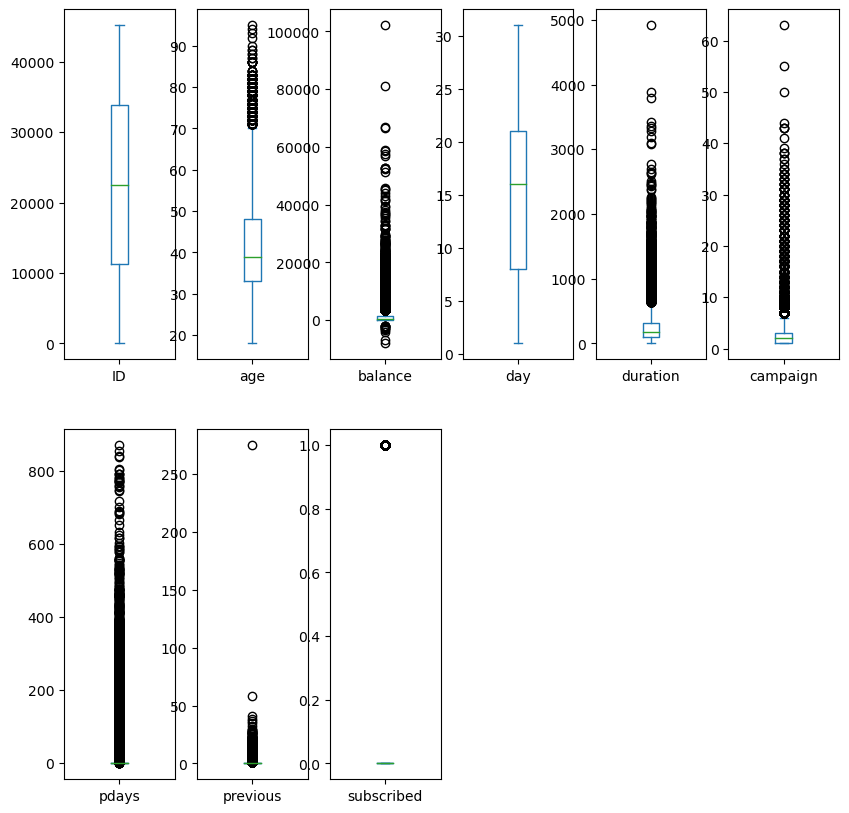

In [28]:
train.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

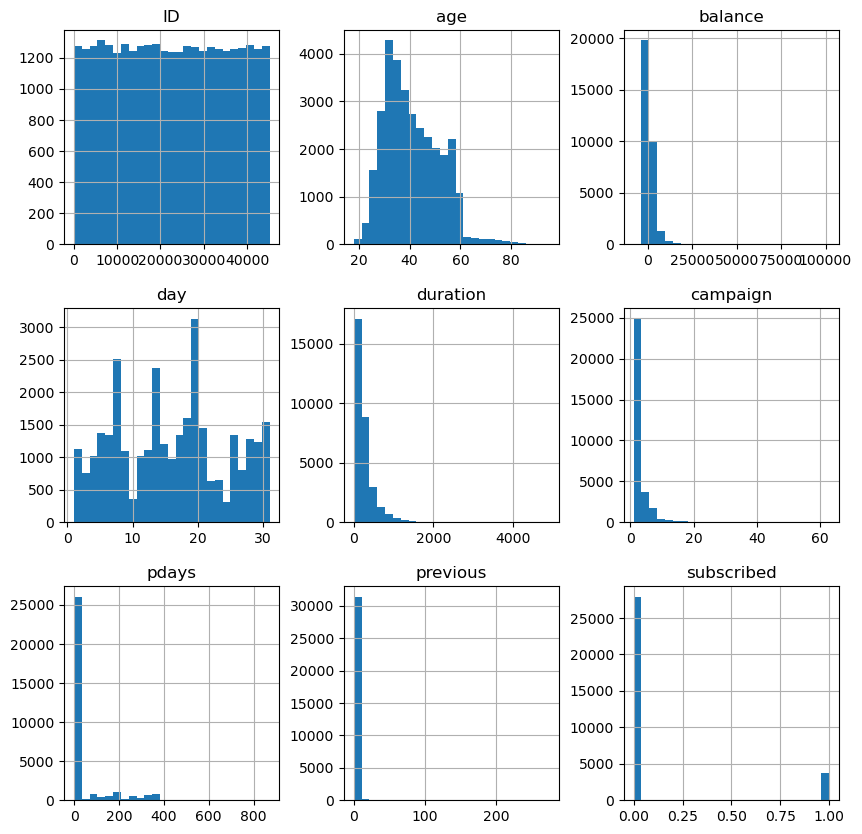

In [29]:
train.hist(bins=25,figsize=(10,10))
plt.show()

In [30]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [31]:
target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [32]:
#generating dummy values on the train dataset
train = pd.get_dummies(train)
train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#MODELLING
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_val,y_train,y_val= train_test_split(train,target,test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred= RFR.predict(x_val)
    acc= accuracy_score(y_val, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRs= i
print('Best Accuracy is:',maxAccu, 'at random_state',maxRs)

Best Accuracy is: 0.9165876777251185 at random_state 154


In [35]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=154)

In [36]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
# RandomForest Classifier:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_val)
print(accuracy_score(y_val,predRFC))
print(confusion_matrix(y_val,predRFC))
print(classification_report(y_val,predRFC))

ValueError: Found input variables with inconsistent numbers of samples: [22152, 25317]

In [38]:
#Logistic Regression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_val)
print(accuracy_score(y_val,predLR))
print(confusion_matrix(y_val,predLR))
print(classification_report(y_val,predLR))


ValueError: Found input variables with inconsistent numbers of samples: [22152, 25317]